<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Challenge S4: Redes Neuronales Convolucionales en Keras (CNNs) para Fashion MNIST

## Objetivos

El objetivo de este challenge es crear una CNN profunda capaz de distinguir entre números las prendas de ropa de Fashion MNIST, y evaluar su comportamiento mediante el análisis de sus curvas de rendimiento.

## Punto de partida

El punto de partida se corresponde con el código que hemos visto en el worksheet, añadiendo una variable "history" para guardar la salida del histórico del entrenamiento, y poder analizar su comportamiento después:

In [18]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

import keras
# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

# Reshape input to [width, height, #channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_valid = np_utils.to_categorical(Y_valid, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
          verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 19s 380us/step - loss: 10.421

## Tareas

Vamos a comenzar incrementando la profundidad de nuestro modelo, y continuaremos con el análisis del rendimiento de cada arquitectura: 

### Añadir una segunda capa convolucional

A partir del código anterior, realizar las modificaciones necesarias para añadir una segunda capa convolucional con 32 filtros, de tamaño 3x3 y función de activación relu.
A continuación, añadiremos también una capa max_pooling con un kernel de tamaño 2x2 y un paso de 2.

NOTA: Guarda el histórico del entrenamiento en una variable "history2" para no sobreescribir la anterior y poder evaluar ambos modelos sin tener que volver a repetir su ejecución.


In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history2 = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
          verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               200832    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total para

##### ¿Ha mejorado el resultado? ¿Por qué?

Al reducir las dimensiones de las características, observamos un mejor resultado tanto en precisión como en pérdidas.


##### ¿Ha incrementado el tamaño del modelo? ¿Por qué?

No, el tamaño del modelo ha disminuido; al principio se obtenían 804,554 parámetros mientras que al añadir una nueva capa convolucional y la capa de pooling, obtenemos 211,690. Estos parámetros son los parámetros entrenables de nuestra red convolucional.

El tamaño del modelo no ha incrementado ya que al añadir las nuevas capas (convolucional + Pooling), se ha disminuido el tamaño de las imágenes, por lo que el número de parámetros que llegará a la capa Dense disminuirá también.


### Visualización del entrenamiento

Otra de las utilidades que nos ofrece Keras es la posibilidad de acceder al histórico del entrenamiento de un modelo para poder ver las curvas de entrenamiento.

Para acceder a este histórico, tan sólo tenemos que guardar la salida de la llamada a model.fit.

El código de una función para imprimir las curvas de aprendizaje por pantalla se muestra a continuación.

Ejecútalo y contesta las preguntas de la siguiente celda para el primer modelo y el segundo (una o dos capas convolucionales +  maxpooling).


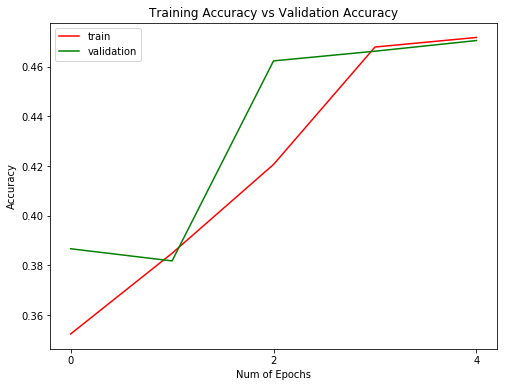

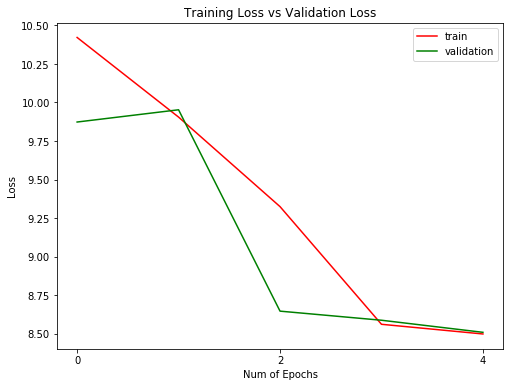

In [20]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import matplotlib.pyplot as plt

def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['acc'],'r')
    plt.plot(history.history['val_acc'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
 
 
    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
 
 
    plt.show()
    
plotCurves(history,5)

###### ¿Te parecen buenas curvas de aprendizaje? ¿Te parece que incrementando el número de iteraciones, el rendimiento mejoraría?

En mi opinión, son buenas curvas de aprendizaje ya que a partir del segundo epoch obtenemos, al validar el modelo, una precisión igual a la obtenida con los datos de entrenamiento. Lo mismo pasaría con las pérdidas.
No creo que el rendimiento mejorara en exceso ya que en dos epochs tanto la precisión como los valores de pérdidas se han mantenido más o menos estables y desde la cuarta epoch a la quinta no se ha mejorado en exceso.

Analiza ahora las curvas para el segundo modelo, y contesta a las mismas preguntas pero para "history2":


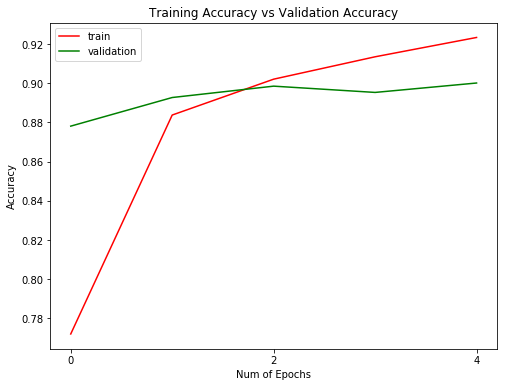

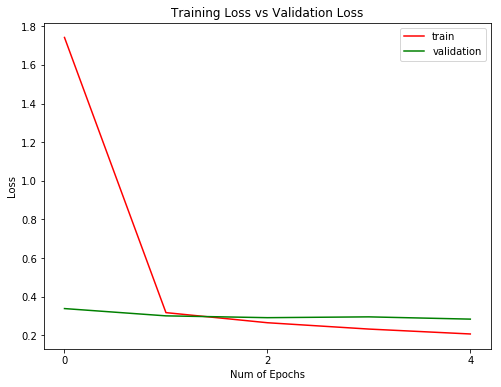

In [21]:
plotCurves(history2,5)

###### ¿Te parecen buenas curvas de aprendizaje? ¿Te parece que incrementando el número de iteraciones, el rendimiento mejoraría?

Como se puede observar, estas curvas de aprendizaje mantienen una forma más uniforme que en el caso anterior. Sin embargo, en este caso no parece que las cuvas de validación converjan como anteriormente, que en la segunda epoch ya obteníamos un resultado parecido al de entrenamiento. Sin embargo, creo que son buenas curvas de aprendizaje ya que obtenemos buenos resultados tanto de precisión como de pérdidas.

No creo que el rendimiento mejorase en exceso, en las últimas epochs no se han apreciado grandes diferencias entre ellas.
